In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np
from xmlrpc.client import MAXINT
from xmlrpc.client import MININT
import copy
%matplotlib notebook

In [7]:
with open('cluster_data.txt','r') as file:
    lines = file.readlines()


In [8]:
x = []
y = []
data = []
for line in lines:
    string = line.split('\t')
    x.append(float(string[1]))
    y.append(float(string[2]))
    data.append([float(string[1]),float(string[2])])

<IPython.core.display.Javascript object>


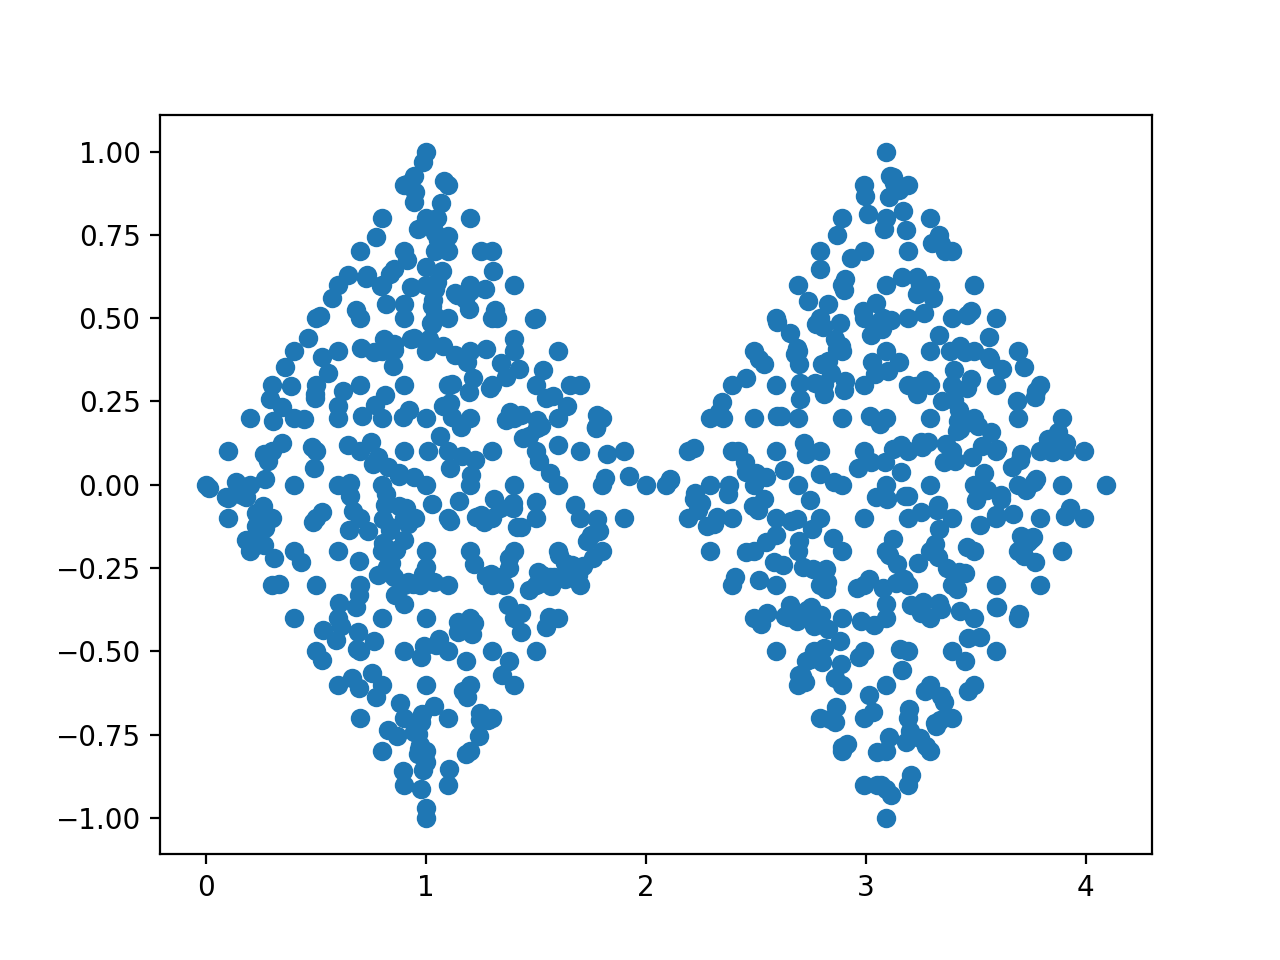

In [9]:
fig = plt.figure()
plt.scatter(x,y)

In [5]:
def randomcolor():    
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']   
    color = ""   
    for i in range(6):     
        color += colorArr[random.randint(0,14)]  
    return "#"+color

In [10]:
def k_means(data, k, iters): 
    l = len(data[0])
    #rep = [[] for i in range(k)]
    rep = random.sample(data,k)
    
    
    #rep = [[random.uniform(0,4),random.uniform(-1,1)] for i in range(k)]
    for ite in range(iters):  
        cluster = [[] for i in range(k)]
        for point in data: #assign cluster
            #print(point)
            dist = [0]*k
            for j in range(k):
                s = 0
                for p in range(l):
                    s += (point[p]-rep[j][p])**2
                    #dist[j] = ((point[0]-rep[j][0])**2+(point[1]-rep[j][1])**2)**(1/2)
                dist[j] = s**(1/2)
            #print(dist)
            
            cluster[np.argmin(dist)].append(point)
        
        old_rep = copy.deepcopy(rep)
        for c in range(k):
            Sum = [0 for i in range(l)]
            for m in range(l):
                for n in cluster[c]:
                    Sum[m] += n[m]
                rep[c][m] = Sum[m]/len(cluster[c])
        if(old_rep == rep):
            return cluster
            break
    return cluster

In [11]:
def cluster_plot(clusters):
        fig_c = plt.figure()
        plt.xlabel('Length')
        plt.ylabel('Width')            
        legend = []
        for i in range(len(clusters)):
            cx = []
            cy = []
            mark = ['x','.','+','*','o']
            for point in clusters[i]:
                cx.append(float(point[0]))
                cy.append(float(point[1]))
            plt.scatter(cx,cy,color = randomcolor(),marker = mark[i], label='Cluster '+str(i+1))
        plt.legend()

<IPython.core.display.Javascript object>


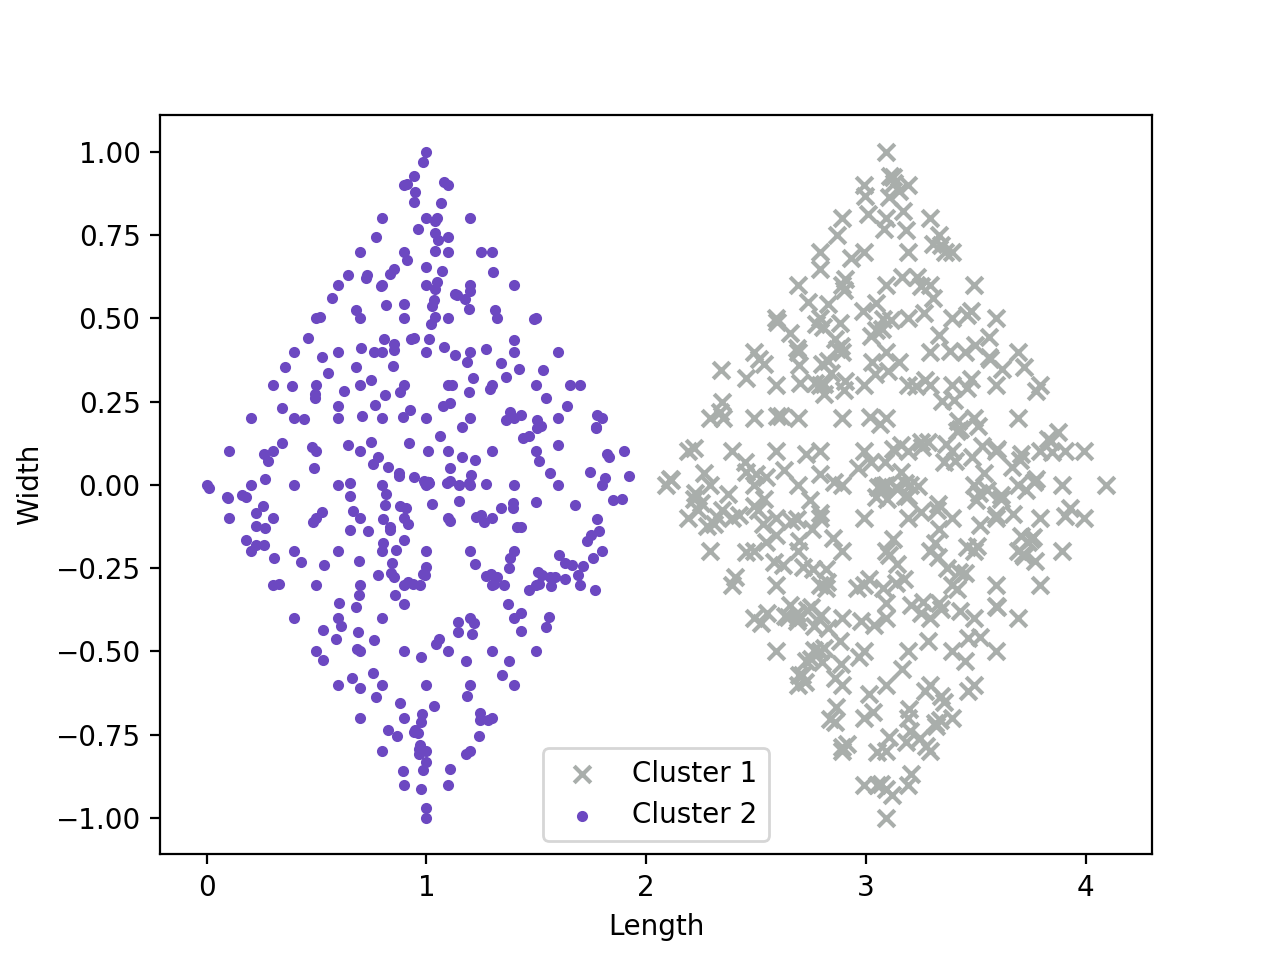

In [202]:
clusters = k_means(data,2,100)
cluster_plot(clusters)

<IPython.core.display.Javascript object>


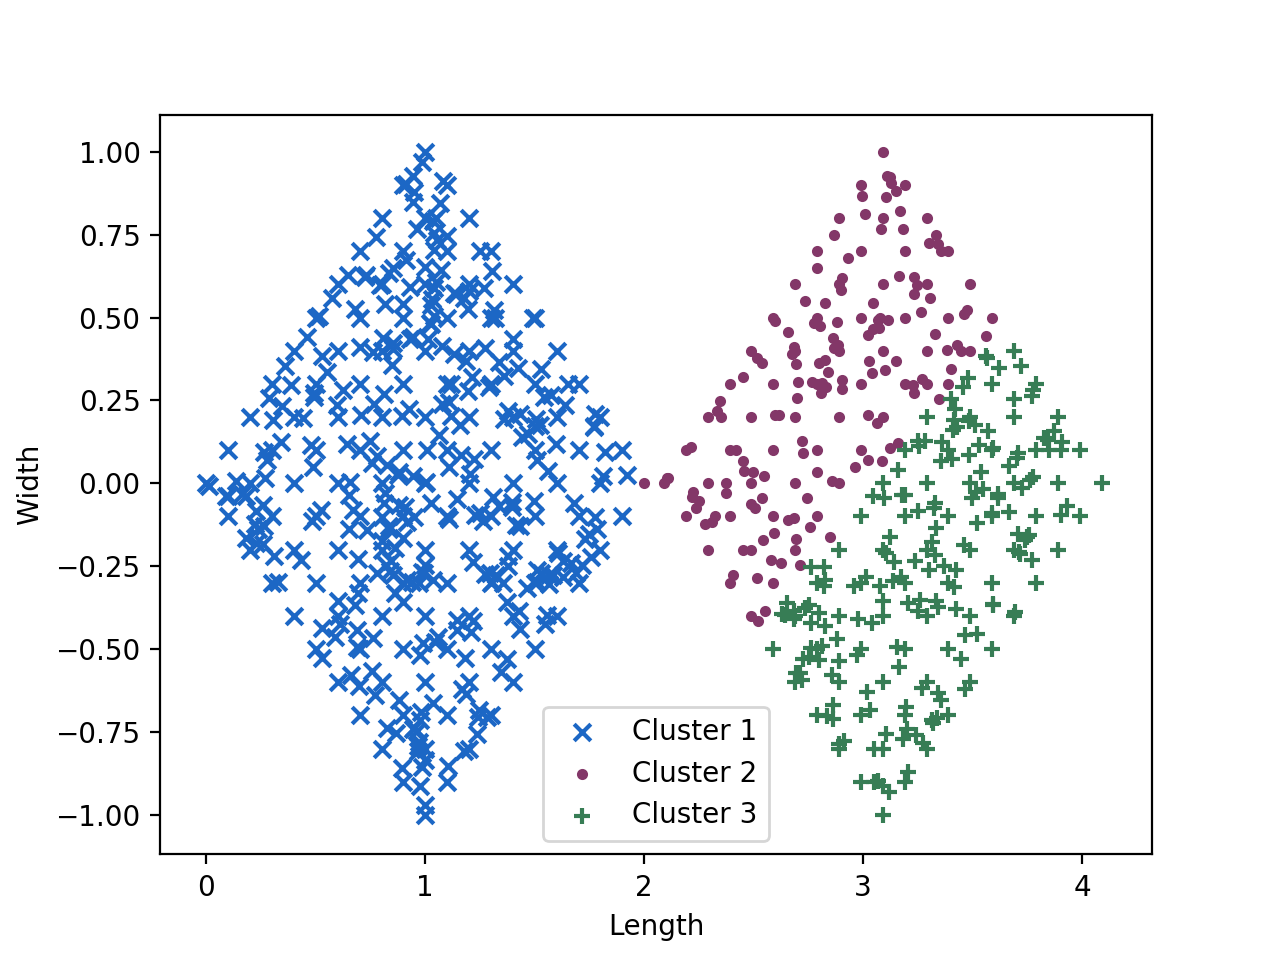

In [12]:
clusters = k_means(data,3,100)
cluster_plot(clusters)

<IPython.core.display.Javascript object>


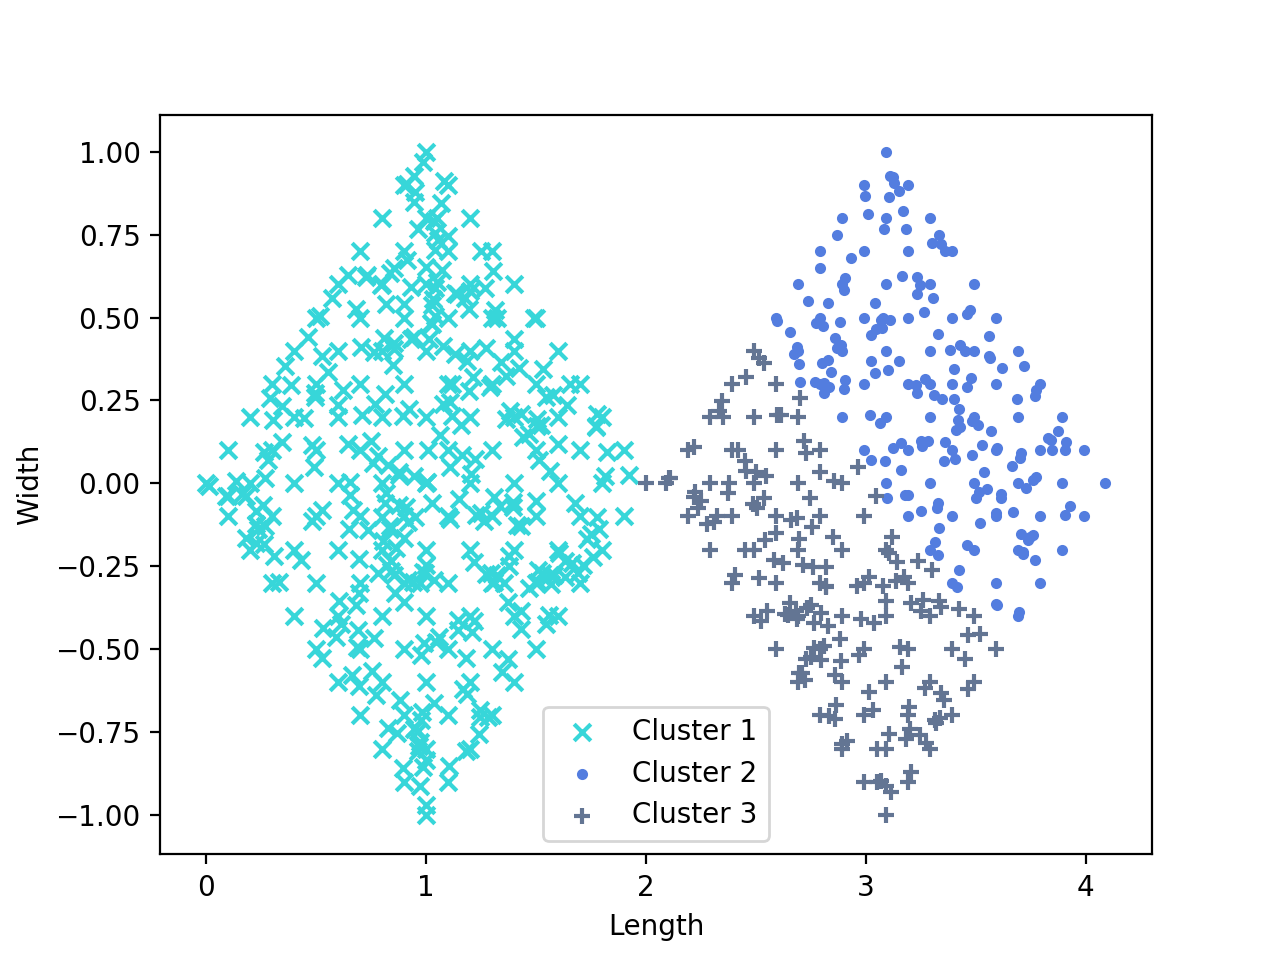

In [13]:
clusters = k_means(data,3,100)
cluster_plot(clusters)